In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CustomJS, TextInput
output_notebook()

Loading BokehJS ...

In [2]:
# Load the data and prepare position for teams
df = pd.read_csv('../../data_sets/datas_jane_street_market/jane-street-market-prediction-publicleaderboard.csv')
df.head()

TeamId       TeamName       SubmissionDate      Score
0  5952904           Anna  2021-02-22 08:56:25  11869.998
1  5896948          MarsX  2021-02-22 18:17:50  11698.695
2  6124283  Manuel Campos  2021-02-22 18:41:27  11676.850
3  6036209        BoolArt  2021-02-22 23:32:03  11659.566
4  5940404        Kirderf  2021-02-22 13:52:35  11582.963

In [4]:
# Check dtypes
df.dtypes

TeamId              int64
TeamName           object
SubmissionDate     object
Score             float64
dtype: object

In [5]:
df["SubmissionDate"] = pd.to_datetime(df["SubmissionDate"]) # Convert Object to Date Type
df["Rank"] = df["Score"].rank() # Rank
df["Rank"] = df["Rank"].max() - df["Score"].rank() + 1

In [7]:
df.head(2)

TeamId TeamName      SubmissionDate      Score  Rank
0  5952904     Anna 2021-02-22 08:56:25  11869.998   1.0
1  5896948    MarsX 2021-02-22 18:17:50  11698.695   2.0

In [11]:
df["SubmissionDays"] = (df["SubmissionDate"].max() - df["SubmissionDate"]).dt.days
df.head(3)

TeamId       TeamName      SubmissionDate      Score  Rank  SubmissionDays
0  5952904           Anna 2021-02-22 08:56:25  11869.998   1.0               0
1  5896948          MarsX 2021-02-22 18:17:50  11698.695   2.0               0
2  6124283  Manuel Campos 2021-02-22 18:41:27  11676.850   3.0               0

In [17]:
firstScoreDate = df.groupby("Score")["SubmissionDate"].transform("min")
uniqueScore = df.groupby("Score")["SubmissionDate"].transform("count") == 1

In [18]:
df["color"] = "red"
df.loc[uniqueScore, "color"] = "blue"
df.loc[firstScoreDate < df["SubmissionDate"], "color"] = "yellow"

In [20]:
df.head(3)

TeamId       TeamName      SubmissionDate  ...  Rank  SubmissionDays  color
0  5952904           Anna 2021-02-22 08:56:25  ...   1.0               0   blue
1  5896948          MarsX 2021-02-22 18:17:50  ...   2.0               0   blue
2  6124283  Manuel Campos 2021-02-22 18:41:27  ...   3.0               0   blue

[3 rows x 7 columns]

## Combine all in a Function

In [51]:
def process_df(df):
    df['SubmissionDate'] = pd.to_datetime(df['SubmissionDate'])
    df['Rank'] = df['Score'].rank()
    df['Rank'] = df['Rank'].max() - df['Score'].rank() + 1
    df['SubmissionDays'] = (df['SubmissionDate'].max() - df['SubmissionDate']).dt.days
    firstScoreDate = df.groupby('Score')['SubmissionDate'].transform('min')
    uniqueScore = df.groupby('Score')['SubmissionDate'].transform('count') == 1
    df['color'] = 'red'
    df.loc[uniqueScore, 'color'] = 'blue'
    df.loc[firstScoreDate < df['SubmissionDate'], 'color'] = 'yellow'

## Check distributions of Scores

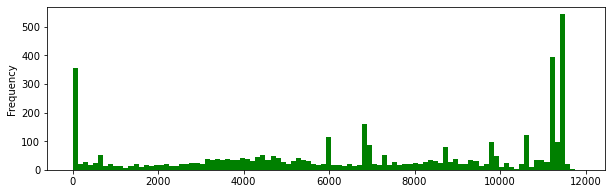

In [27]:
df["Score"].plot.hist(bins = 100, color = "green", figsize = (10,3))
plt.show()

In [30]:
# Count Unique cases and ratio of unique cases
df["Score"].nunique(), df["Score"].nunique()/ len(df)

(2392, 0.5634864546525324)

In [34]:
# Count of cases with Score > 10000 and ratio of Unique Cases with Score > 10000
topscores = df[df["Score"] > 10000]["Score"]
topscores.head()

0    11869.998
1    11698.695
2    11676.850
3    11659.566
4    11582.963
Name: Score, dtype: float64

In [35]:
len(topscores), topscores.nunique(), topscores.nunique() / len(topscores)

(1347, 441, 0.3273942093541203)

<AxesSubplot:ylabel='Frequency'>

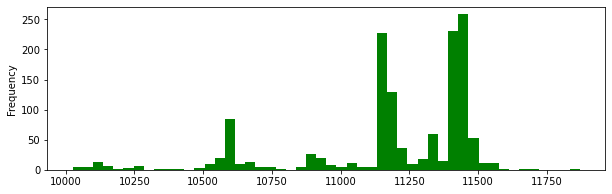

In [37]:
# Check Distribution of top scores
df.where(df.Score > 10000)["Score"].plot.hist(bins = 50, color = "green", figsize = (10,3))

In [39]:
df["SubmissionDays"].unique() # Unique Values inside Submission Days

array([ 0,  2,  5,  1,  6, 15, 14,  3,  7, 12,  4, 18,  9, 11, 22, 19, 16,
       21, 13, 10,  8, 23, 17, 20, 24, 25, 26, 36, 27, 32, 48, 30, 29, 28,
       58, 34, 37, 42, 57, 44, 31, 55, 33, 56, 59, 49, 41, 38, 61, 40, 60,
       47, 50, 51, 43, 54, 39, 46, 53, 45, 35, 64, 62, 71, 63, 67, 70, 52,
       68, 69, 72, 66, 65, 75, 73, 76, 74, 89, 85, 87, 81, 78, 79, 88, 82,
       86, 83, 84, 77, 80, 90, 91], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

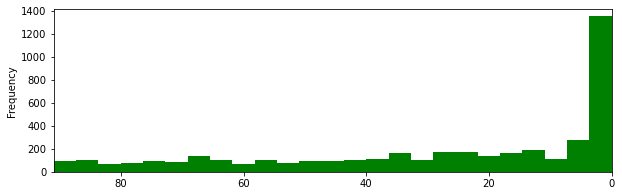

In [43]:
# Check the distributions of Submission Days
df["SubmissionDays"].plot.hist(bins = 25, color = "green", figsize = (10,3), xlim = (df["SubmissionDays"].max(),df["SubmissionDays"].min()))

## Scatter of Date and Score

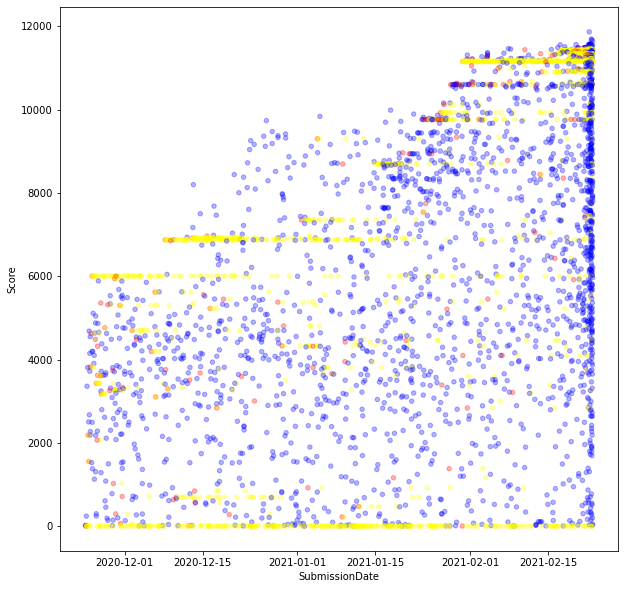

In [45]:
df.plot.scatter(x = "SubmissionDate", y = "Score", c = "color", alpha = 0.3, figsize = (10,10))
plt.show()

In [46]:
df["Score"].value_counts().head(10)

0.000        274
11160.505    214
11417.036    202
6876.782     124
6005.582      93
11170.252     91
11440.873     71
11428.043     68
6919.832      62
11450.656     49
Name: Score, dtype: int64

<AxesSubplot:xlabel='SubmissionDate', ylabel='Rank'>

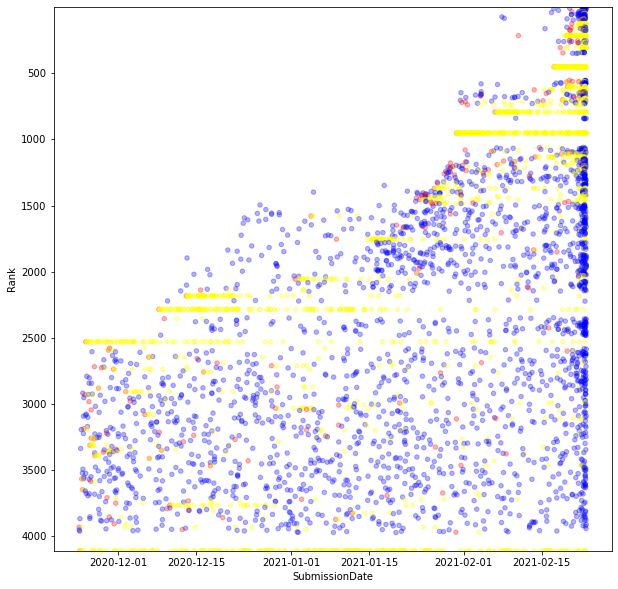

In [48]:
# Scatter of Date and Rank
df.plot.scatter(x = "SubmissionDate", y = "Rank", c = "color", alpha = 0.3,
               figsize = (10,10), ylim = (df.Rank.max(), df.Rank.min()))

## 2020-03-05 ( First Private LB)

In [49]:
# Load data and prepare position for teams
private1 = pd.read_csv("../../data_sets/datas_jane_street_market/jane-street-market-prediction-20200305.csv")

In [50]:
private1.head()

TeamId          TeamName       SubmissionDate     Score
0  5936721  Robert Manolache  2021-02-22 05:29:55  5795.416
1  6003948             float  2021-01-28 07:56:30  5792.222
2  5889545             hklee  2021-02-22 01:27:08  5655.716
3  5918656       codefluence  2021-02-22 21:02:39  5647.179
4  5995714              一剑风吼  2021-02-01 08:29:25  5646.342

In [52]:
process_df(private1)

In [53]:
private1.head()

TeamId          TeamName      SubmissionDate  ...  Rank  SubmissionDays  color
0  5936721  Robert Manolache 2021-02-22 05:29:55  ...   1.0               0   blue
1  6003948             float 2021-01-28 07:56:30  ...   2.0              25   blue
2  5889545             hklee 2021-02-22 01:27:08  ...   3.0               0   blue
3  5918656       codefluence 2021-02-22 21:02:39  ...   4.0               0   blue
4  5995714              一剑风吼 2021-02-01 08:29:25  ...   5.0              21   blue

[5 rows x 7 columns]

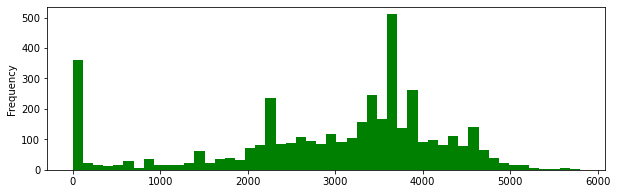

In [55]:
# Check distributions of Scores
private1["Score"].plot.hist(bins=50, color = "green", figsize = (10,3))
plt.show()

In [56]:
# Count of Unique Cases and Ratio of Uniques Cases
private1["Score"].nunique(), private1["Score"].nunique() / len(private1)

(2661, 0.6366028708133972)

In [57]:
# Count of Cases with Score > 4000 and ratio of Unique cases with Score > 4000
topscores = private1[private1["Score"] > 4000]["Score"]
len(topscores), topscores.nunique(), topscores.nunique() / len(topscores)

(726, 626, 0.8622589531680441)

In [58]:
# Top 20 the Most Frequent Scores
private1["Score"].value_counts().head()

0.000       301
3602.878    143
3616.873    118
2273.259     94
4542.817     58
Name: Score, dtype: int64

### Private / Public Results

In [59]:
private1.head(3)

TeamId          TeamName      SubmissionDate  ...  Rank  SubmissionDays  color
0  5936721  Robert Manolache 2021-02-22 05:29:55  ...   1.0               0   blue
1  6003948             float 2021-01-28 07:56:30  ...   2.0              25   blue
2  5889545             hklee 2021-02-22 01:27:08  ...   3.0               0   blue

[3 rows x 7 columns]

In [61]:
private1["PastScore"]  = private1["TeamId"].map(df.set_index("TeamId")["Score"])
private1["PastRank"] = private1["TeamId"].map(df.set_index("TeamId")["SubmissionDate"])
private1["PastSubmissionDate"] = private1["TeamId"].map(df.set_index("TeamId")["SubmissionDate"])
private1["PastSubmissionDays"] = private1["TeamId"].map(df.set_index("TeamId")['SubmissionDays'])

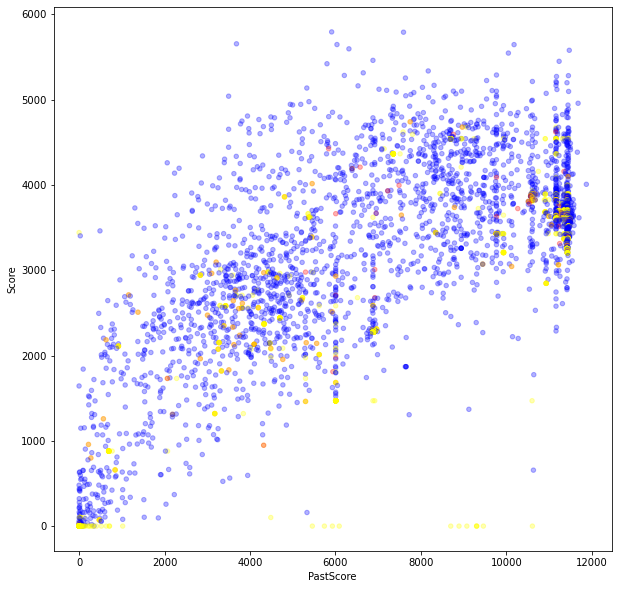

In [63]:
# Scatter of New / Past Scores
private1.plot.scatter(x = "PastScore", y = "Score", c = 'color', alpha = 0.3, figsize = (10,10))
plt.show()

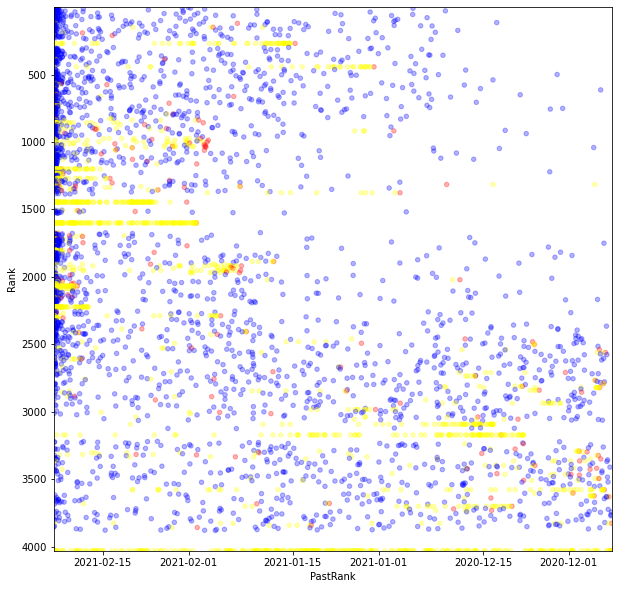

In [70]:
# Scatter of New / Past Rank
private1.plot.scatter(x = "PastRank", y = "Rank", c = "color", alpha = 0.3, 
                     figsize = (10,10), ylim = (private1["Rank"].max(), private1["Rank"].min()),
                    xlim = (private1["PastRank"].max(), private1["PastRank"].min()))
plt.show()

In [72]:
# Scatter of Past Submission Date / Score
private1.plot.scatter(x = "SubmissionDate", y = "Score", c= "color", 
                     alpha = 0.3, figsize = (10,10))
plt.show()

In [73]:
private1["PastScoreMin"] = private1["PastScore"].cummin()
private1["PastRankMax"] = private1['PastRank'].cummax()
private1["PastSubmissionDaysMax"] = private1["SubmissionDays"].cummax()
private1.head()

TeamId          TeamName  ...         PastRankMax  PastSubmissionDaysMax
0  5936721  Robert Manolache  ... 2021-02-22 05:29:55                      0
1  6003948             float  ... 2021-02-22 05:29:55                     25
2  5889545             hklee  ... 2021-02-22 05:29:55                     25
3  5918656       codefluence  ... 2021-02-22 21:02:39                     25
4  5995714              一剑风吼  ... 2021-02-22 21:02:39                     25

[5 rows x 14 columns]

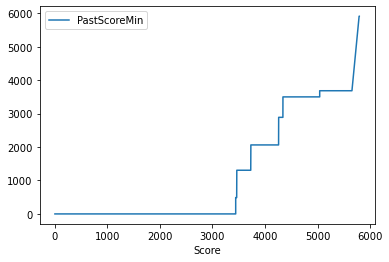

In [75]:
# What is minimum Score Public Score you should have for getting high score
private1.plot(x = "Score", y = "PastScoreMin")
plt.show()

<AxesSubplot:xlabel='Score'>

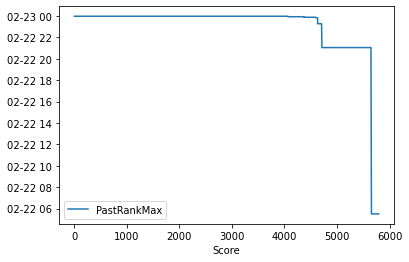

In [81]:
# What is minimum Score Public Rank you should have for getting high rank
private1.plot(x = "Score", y = "PastRankMax")#,
              #ylim = (private1["PastRankMax"].max() + 200, private1["PastRankmax"].min() -200))

In [79]:
private1.plot(x = "Score", y = "PastSubmissionDaysMax")

<AxesSubplot:xlabel='Score'>

## Corr Matrixes

In [86]:
private1[["Score", "PastScore"]].corr()

Score  PastScore
Score      1.000000   0.757404
PastScore  0.757404   1.000000

In [87]:
# Corr matrix
private1[['Rank', 'PastRank']].corr() # Check PastRank

Rank
Rank   1.0

In [89]:
private1[['Rank', 'PastRank']].head(3)

Rank            PastRank
0   1.0 2021-02-22 05:29:55
1   2.0 2021-02-01 01:07:54
2   3.0 2021-02-22 03:10:04

In [91]:
# Corr Matrix
private1[["Score", "PastSubmissionDays"]].head()

Score  PastSubmissionDays
0  5795.416                   0
1  5792.222                  21
2  5655.716                   0
3  5647.179                   0
4  5646.342                  20

In [96]:
# Bokeh Visualization of Private / Public Scores
# Bokeh visualization of Private/Public Scores
# Bokeh visualization of Private/Public Scores

source = ColumnDataSource(private1)
source_visible = ColumnDataSource(private1)

plot = figure(
    x_axis_label = "Public Score",
    y_axis_label = "Private Score",
    tools="pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset",
    plot_width=800,
    plot_height=1000,
)
plot.circle(x="PastScore",y="Score",source = source_visible, radius=3, alpha=0.5, color='color')
plot.text(x='PastScore',y='Score', text='TeamName',source  = source_visible,
       text_baseline="middle", text_align="left", text_font_size='8pt', text_font='Arial', alpha=0.5)

hover = HoverTool(tooltips = [
    ('Team', '@TeamId / @TeamName'), 
    ('Public Score/ Private Score', '@PastScore{i} / @Score{i}')])
plot.add_tools(hover)

callback = CustomJS(args=dict(source_visible=source_visible,
              source=source), code="""
        var f = cb_obj.value
        var data = source.data;
        
        var data_visible = {'SubmissionDate': [], TeamId':[], 'TeamName': [], 'Score': [], 'PastScore': [], 'color': []}
        
        for (var i = 0; i < data['TeamId'].length; i++) {
            if (data['TeamName'][i].includes(f)) {
                data_visible['SubmissionDate'].push(data['SubmissionDate'][i])
                data_visible['TeamId'].push(data['TeamId'][i])
                data_visible['TeamName'].push(data['TeamName'][i])
                data_visible['Score'].push(data['Score'][i])
                data_visible['PastScore'].push(data['PastScore'][i])
                data_visible['color'].push(data['color'][i])
            }
        }
        
        source_visible.data = data_visible
        source_visible.change.emit();
    """)

text_input = TextInput(value="", title="Filter by TeamName:")
text_input.js_on_change("value", callback)

show(column(text_input, plot))